In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [2]:
# Define directories
data_dir = 'c:\\Users\\Asus\\Desktop\\DL-PotatoDisease\\training\\Potato'


In [3]:
# List all image files
image_files = []
labels = []

for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if os.path.isdir(folder_path):
        for image_name in os.listdir(folder_path):
            image_files.append(os.path.join(folder_path, image_name))
            labels.append(folder_name)

In [4]:
# Encode labels into integer format
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [5]:
# Split data into train and test sets
train_files, test_files, train_labels, test_labels = train_test_split(image_files, labels, test_size=0.2, random_state=42)

# Parameters
img_width, img_height = 150, 150
batch_size = 32
epochs = 10
num_classes = 3

In [6]:
# Convert labels to one-hot encoded format
num_classes = len(set(labels))
train_labels = to_categorical(train_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)

In [7]:
# Preprocessing and data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2
)

In [8]:

# Preprocessing and data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# Custom generator for train data
def train_generator():
    while True:
        for i in range(0, len(train_files), batch_size):
            batch_files = train_files[i:i+batch_size]
            batch_labels = train_labels[i:i+batch_size]
            batch_images = [np.array(Image.open(file).resize((img_width, img_height))) for file in batch_files]
            yield np.array(batch_images), np.array(batch_labels)

In [10]:
# Custom generator for test data
def test_generator():
    while True:
        for i in range(0, len(test_files), batch_size):
            batch_files = test_files[i:i+batch_size]
            batch_labels = test_labels[i:i+batch_size]
            batch_images = [np.array(Image.open(file).resize((img_width, img_height))) for file in batch_files]
            yield np.array(batch_images), np.array(batch_labels)

In [11]:
# Build CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
print(train_files[:5])
print(test_files[:5])


['c:\\Users\\Asus\\Desktop\\DL-PotatoDisease\\training\\Potato\\Early\\4a7c680d-9c18-4065-a6e0-70cd2d0a3207___RS_Early.B 8107.JPG', 'c:\\Users\\Asus\\Desktop\\DL-PotatoDisease\\training\\Potato\\Late\\bc53f0fd-df00-42c6-ad50-aef25d2c6f7a___RS_LB 2954.JPG', 'c:\\Users\\Asus\\Desktop\\DL-PotatoDisease\\training\\Potato\\Late\\04b964fd-7033-4cdf-88ef-b1acbcd8183a___RS_LB 2783.JPG', 'c:\\Users\\Asus\\Desktop\\DL-PotatoDisease\\training\\Potato\\Early\\5fbff81d-eeaf-430f-ba94-df6a92c7b8e2___RS_Early.B 6816.JPG', 'c:\\Users\\Asus\\Desktop\\DL-PotatoDisease\\training\\Potato\\Late\\5551d3fa-ed55-46df-8a35-b3c53ffdcd31___RS_LB 4138.JPG']
['c:\\Users\\Asus\\Desktop\\DL-PotatoDisease\\training\\Potato\\Late\\3e379b4f-29dd-4f14-86e6-11fa37cf3ae9___RS_LB 4789.JPG', 'c:\\Users\\Asus\\Desktop\\DL-PotatoDisease\\training\\Potato\\Late\\43dde1e0-8c73-45af-8fbf-d500e450a154___RS_LB 3270.JPG', 'c:\\Users\\Asus\\Desktop\\DL-PotatoDisease\\training\\Potato\\Healthy\\1717137988365.jpg', 'c:\\Users\\Asus\\D

In [13]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Train the model
model.fit(train_generator(),
          steps_per_epoch=len(train_files) // batch_size,
          epochs=epochs,
          validation_data=test_generator(),
          validation_steps=len(test_files) // batch_size,
          callbacks=[early_stopping, reduce_lr])

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 35s 535ms/step - accuracy: 0.4124 - loss: 14.7550 - val_accuracy: 0.3973 - val_loss: 1.0674 - learning_rate: 0.0010
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 29s 501ms/step - accuracy: 0.4173 - loss: 1.0549 - val_accuracy: 0.4045 - val_loss: 1.0408 - learning_rate: 0.0010
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 30s 509ms/step - accuracy: 0.4416 - loss: 1.0243 - val_accuracy: 0.3955 - val_loss: 1.0333 - learning_rate: 0.0010
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 31s 528ms/step - accuracy: 0.4321 - loss: 1.0150 - val_accuracy: 0.5169 - val_loss: 1.0004 - learning_rate: 0.0010
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 31s 528ms/step - accuracy: 0.4817 - loss: 0.9639 - val_accuracy: 0.4494 - val_loss: 0.9391 - learning_rate: 0.0010
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 30s 510ms/step - accuracy: 0.4486 - loss: 0.9916 - val_accuracy: 0.4292 - val_loss: 1.0240 - learning_rate: 0.0010
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 29s 497ms/step - accuracy: 0.4027 - loss: 1

In [16]:

# Function to load a batch of test data
def load_test_data(batch_size):
    for i in range(0, len(test_files), batch_size):
        batch_files = test_files[i:i+batch_size]
        batch_labels = test_labels[i:i+batch_size]
        batch_images = [np.array(Image.open(file).resize((img_width, img_height))) for file in batch_files]
        yield np.array(batch_images), np.array(batch_labels), batch_files

In [17]:
# Get one batch of test data
test_images, test_labels, test_file_paths = next(load_test_data(batch_size))


In [18]:
# Predict the labels for the test images
predictions = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


In [19]:
# Decode predictions and actual labels
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(test_labels, axis=1)
predicted_label_names = label_encoder.inverse_transform(predicted_labels)
actual_label_names = label_encoder.inverse_transform(actual_labels)

In [20]:
# Function to plot images with actual and predicted labels
def plot_images(images, actual_labels, predicted_labels, file_paths, num_images=20):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(4, num_images // 2, i + 1)
        plt.imshow(images[i])
        plt.title(f"Actual: {actual_labels[i]}\nPredicted: {predicted_labels[i]}")
        plt.xlabel(os.path.basename(file_paths[i]))
        plt.axis('off')
    plt.show()

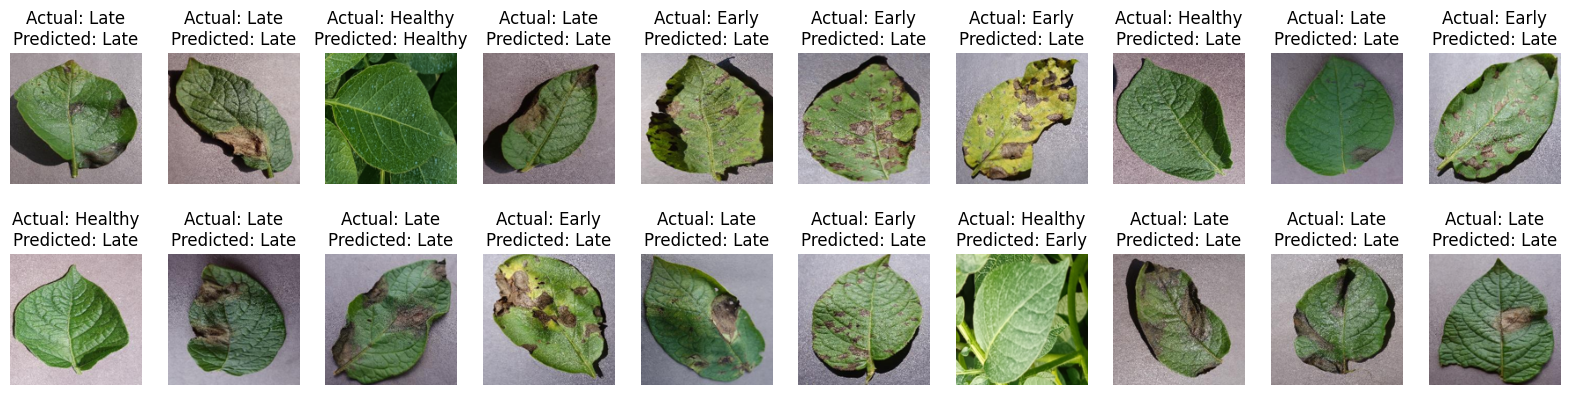

In [21]:
# Plot the images along with actual and predicted labels
plot_images(test_images, actual_label_names, predicted_label_names, test_file_paths, num_images=20)